In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx
from flow_computation import flow_computation

In [2]:
## Load necessary data
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))
paths = pickle.load(open('data/final_paths.p', "rb"))

In [3]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

## Plot network flow within data set

We want to use the flow value for each path to compute the flow value for each link using paths now

In [4]:
flows = flow_computation(df_ivs, 100000, path_lengths)

In [5]:
sum(flows.values())/(24*100*1000)

1.2257671626984261

In [6]:
df_links = nx.to_pandas_edgelist(G)

In [7]:
def plot_context(G, flows, attribute_name, scale_factor, scale=True):

    df_links[attribute_name] = 0
    for key, flow in flows.items():
        route = paths[key]
        # print(route)
        passed_links = [route[i:(i + 2)] for i in range(len(route) - 1)]
        # print(passed_links)
        for link in passed_links:
            df_links.loc[(df_links.source.isin(link)) & (df_links.target.isin(link)), attribute_name] += flow

    flow_values_edges = dict(zip(tuple(zip(df_links.source, df_links.target)), df_links[attribute_name]))
    nx.set_edge_attributes(G, flow_values_edges, attribute_name)

    fig, ax = plt.subplots(dpi=200)


    widths = nx.get_edge_attributes(G, attribute_name)
    scale_factor = scale_factor
    if scale:
        scaled_widths = {i:((widths[i]/widths0[i])*scale_factor) for i in widths.keys() if widths0[i]!=0}
    else:
        scaled_widths = {i:(widths[i]/scale_factor) for i in widths.keys()}



    nx.draw_networkx_edges(G,pos_dict,
                           edgelist = scaled_widths.keys(),
                           width=list(scaled_widths.values()),
                           # edge_color='blue',
                           alpha=1)

    nx.draw_networkx_nodes(G,pos_dict,
                       nodelist=harbour_nodes,
                       node_size=30,
                       node_color='r',
                       alpha=1)

    # nx.draw_networkx_labels(G, pos=pos_dict,
    #                         labels=dict(zip(nodelist,nodelist)),
    #                         font_color='white')
    plt.box(False)
    img = plt.imread("data/NL_map.png")
    x1, x2, y1, y2 = 3.566619, 6.944693, 50.860830, 53.444274
    z = 0.53
    ax.imshow(img, extent=[x1-z, x2+z, y1-z+0.3, y2+z-0.3])
    plt.show()
    return widths

In [8]:
df_links

source   target  CoupledDepth  SeaFairingWidth  WidePushedLength  \
0    8864153  8860579           NaN              NaN               NaN   
1    8864153  8868168           NaN              NaN               NaN   
2    8868065  8862419           NaN              NaN               NaN   
3    8868065  8866297           NaN              NaN               NaN   
4    8868065  8863614           NaN              NaN               NaN   
..       ...      ...           ...              ...               ...   
273  8864929  8862448           NaN              NaN               NaN   
274  8860920  8865119           NaN              NaN               NaN   
275  8865894  8863335           NaN              NaN               NaN   
276  8868457  8861499           NaN              NaN               NaN   
277  8861499  8864076           NaN              NaN               NaN   

     GeoType  SeaFairingHeight EndJunctionId  PushedLength Classification  \
0        NaN               NaN           NaN           NaN            NaN   
1        NaN               NaN           NaN           NaN            NaN   
2        NaN               NaN           NaN           NaN            NaN   
3        NaN               NaN           NaN           NaN            NaN   
4        NaN               NaN           NaN           NaN            NaN   
..       ...               ...           ...           ...            ...   
273      NaN               NaN           NaN           NaN            NaN   
274      NaN               NaN           NaN           NaN            NaN   
275      NaN               NaN           NaN           NaN            NaN   
276      NaN               NaN           NaN           NaN            NaN   
277  section               NaN       8864076           NaN           CEMT   

     ...  CoupledLength  CoupledWidth                       Description  Code  \
0    ...            NaN           NaN                               NaN   NaN   
1    ...            NaN           NaN                               NaN   NaN   
2    ...            NaN           NaN                               NaN   NaN   
3    ...            NaN           NaN                               NaN   NaN   
4    ...            NaN           NaN                               NaN   NaN   
..   ...            ...           ...                               ...   ...   
273  ...            NaN           NaN                               NaN   NaN   
274  ...            NaN           NaN                               NaN   NaN   
275  ...            NaN           NaN                               NaN   NaN   
276  ...            NaN           NaN                               NaN   NaN   
277  ...            NaN           NaN  Tweebaksduwstel (lange formatie)   V_B   

                                              geometry  WidePushedDepth  \
0                                                  NaN              NaN   
1                                                  NaN              NaN   
2                                                  NaN              NaN   
3                                                  NaN              NaN   
4                                                  NaN              NaN   
..                                                 ...              ...   
273                                                NaN              NaN   
274                                                NaN              NaN   
275                                                NaN              NaN   
276                                                NaN              NaN   
277  {'type': 'LineString', 'coordinates': ((5.2098...              NaN   

     Length                          Name  \
0       NaN                           NaN   
1       NaN                           NaN   
2       NaN                           NaN   
3       NaN                           NaN   
4       NaN                           NaN   
..      ...                           ...   
273

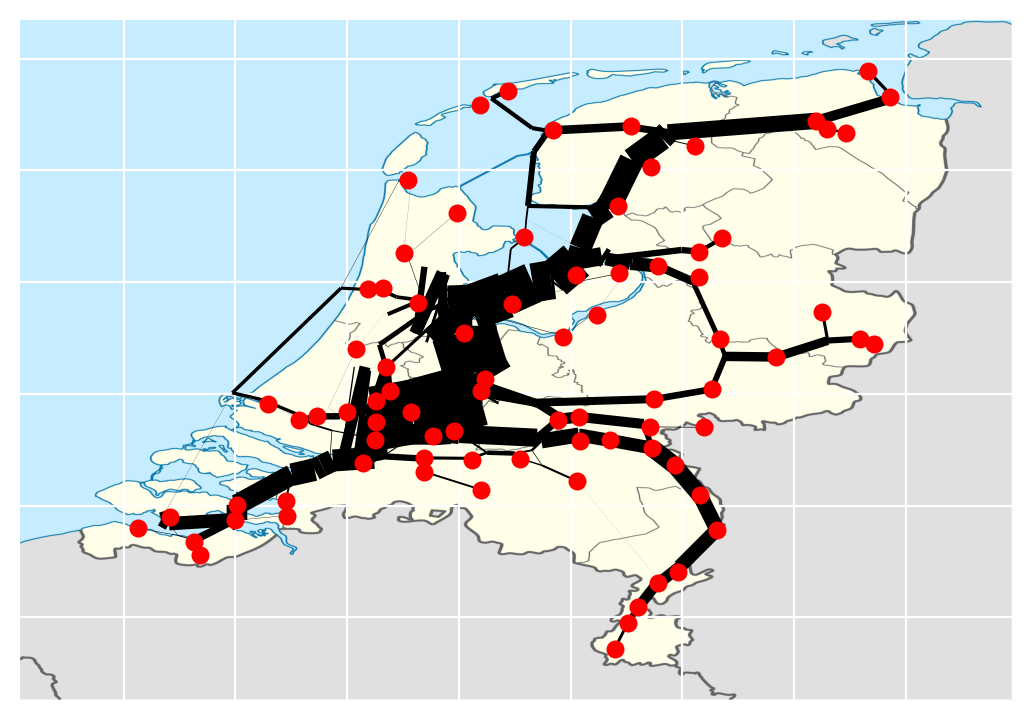

In [9]:
widths0 = plot_context(G, flows, 'passing_flow', 50000, scale=False)

In [10]:
flows

{('NLABL', 'NLRTM', 0): 2703.5759068704283,
 ('NLAER', 'NLLEY', 0): 2212.1197716431006,
 ('NLAER', 'NLNIE', 0): 11277.026528683966,
 ('NLAER', 'NLRTM', 0): 29584.42839171218,
 ('NLAER', 'NLSWI', 0): 2026.462219711935,
 ('NLALK', 'NLIJM', 0): 2958.486641160946,
 ('NLALM', 'NLAMS', 0): 13845.614839244201,
 ('NLALM', 'NLHGL', 0): 1421.2166782652048,
 ('NLAMS', 'NLAER', 0): 15624.956869527034,
 ('NLAMS', 'NLBON', 0): 56.88004312364645,
 ('NLAMS', 'NLBON', 1): 10590.038605722542,
 ('NLAMS', 'NLBOT', 1): 21.603265832212657,
 ('NLAMS', 'NLBOT', 2): 67.67696184470229,
 ('NLAMS', 'NLBOT', 3): 8553.82373515703,
 ('NLAMS', 'NLBOT', 4): 2176.2173477408382,
 ('NLAMS', 'NLDEV', 0): 16468.331098371484,
 ('NLAMS', 'NLDHR', 0): 2227.3959682331165,
 ('NLAMS', 'NLEEM', 0): 10126.443496758706,
 ('NLAMS', 'NLENS', 0): 7595.231536260956,
 ('NLAMS', 'NLEUR', 0): 2893.9147460606778,
 ('NLAMS', 'NLEUR', 1): 2449.7662959954955,
 ('NLAMS', 'NLHEJ', 0): 7110.006358909654,
 ('NLAMS', 'NLIJM', 0): 832.5368028995592

In [11]:
df_links

source   target  CoupledDepth  SeaFairingWidth  WidePushedLength  \
0    8864153  8860579           NaN              NaN               NaN   
1    8864153  8868168           NaN              NaN               NaN   
2    8868065  8862419           NaN              NaN               NaN   
3    8868065  8866297           NaN              NaN               NaN   
4    8868065  8863614           NaN              NaN               NaN   
..       ...      ...           ...              ...               ...   
273  8864929  8862448           NaN              NaN               NaN   
274  8860920  8865119           NaN              NaN               NaN   
275  8865894  8863335           NaN              NaN               NaN   
276  8868457  8861499           NaN              NaN               NaN   
277  8861499  8864076           NaN              NaN               NaN   

     GeoType  SeaFairingHeight EndJunctionId  PushedLength Classification  \
0        NaN               NaN           NaN           NaN            NaN   
1        NaN               NaN           NaN           NaN            NaN   
2        NaN               NaN           NaN           NaN            NaN   
3        NaN               NaN           NaN           NaN            NaN   
4        NaN               NaN           NaN           NaN            NaN   
..       ...               ...           ...           ...            ...   
273      NaN               NaN           NaN           NaN            NaN   
274      NaN               NaN           NaN           NaN            NaN   
275      NaN               NaN           NaN           NaN            NaN   
276      NaN               NaN           NaN           NaN            NaN   
277  section               NaN       8864076           NaN           CEMT   

     ...  CoupledWidth                       Description  Code  \
0    ...           NaN                               NaN   NaN   
1    ...           NaN                               NaN   NaN   
2    ...           NaN                               NaN   NaN   
3    ...           NaN                               NaN   NaN   
4    ...           NaN                               NaN   NaN   
..   ...           ...                               ...   ...   
273  ...           NaN                               NaN   NaN   
274  ...           NaN                               NaN   NaN   
275  ...           NaN                               NaN   NaN   
276  ...           NaN                               NaN   NaN   
277  ...           NaN  Tweebaksduwstel (lange formatie)   V_B   

                                              geometry  WidePushedDepth  \
0                                                  NaN              NaN   
1                                                  NaN              NaN   
2                                                  NaN              NaN   
3                                                  NaN              NaN   
4                                                  NaN              NaN   
..                                                 ...              ...   
273                                                NaN              NaN   
274                                                NaN              NaN   
275                                                NaN              NaN   
276                                                NaN              NaN   
277  {'type': 'LineString', 'coordinates': ((5.2098...              NaN   

     Length                          Name  \
0       NaN                           NaN   
1       NaN                           NaN   
2       NaN                           NaN   
3       NaN                           NaN   
4       NaN                           NaN   
..      ...                           ...   
273     NaN                           NaN   
274     NaN                           NaN   
275     NaN                           NaN   
276     NaN                           NaN   
277

In [12]:
df_links = nx.to_pandas_edgelist(G)

In [13]:
flows = flow_computation(df_ivs, 100000, path_lengths, False)

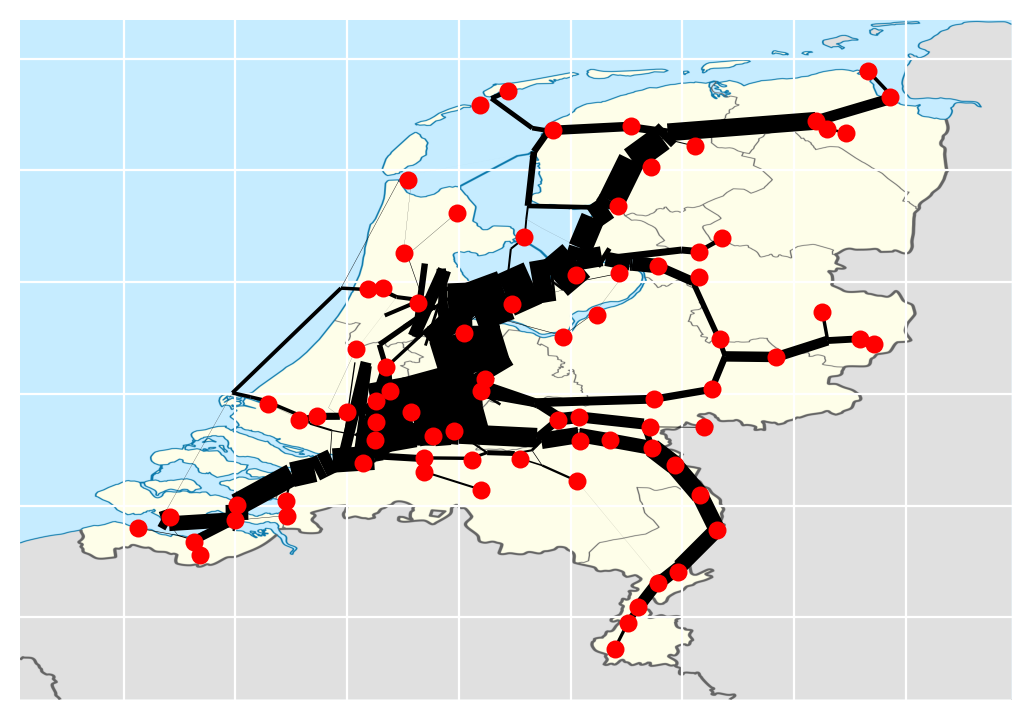

In [14]:
widths1 = plot_context(G, flows, 'passing_flow', 50000, scale=False)

In [15]:
round((sum(widths1.values())-sum(widths0.values()))/sum(widths0.values())*100, 2)

9.79

In [16]:
sum(widths0.values())

56775884.83643783

In [17]:
sum(widths1.values())

62331647.1878443

In [18]:
## Why does using non-individual speeds lead to different results?

In [19]:
ship_data = pd.read_excel('data/ship_types.xlsx')

## Plot captured flow

## 60000

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',_'8863709')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',_'8867258')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8866512',_'8864153')) + 15624.956869527025*Flow_captured_(('NLAMS',_'NLAER',_0),_('8866429',_'8864005')) + 2227.395968233117*Flow_captured_(('NLAMS',_'NLDHR',_0),_('8866429',_'8861625',_'8861568')) + 832.5368028995592*Flow_captured_(('NLAMS',_'NLIJM',_0),_('8862497',)) + 832.5368028995592*Flow_captured_(('NLAMS',_'NLIJM',_0),_('8866429',)) + 991.9932938966092*Flow_captured_(('NLBNB',_'NLHGL',_0),_('8866512',_'8864153')) + 494.8630379993027*Flow_captured_(('NLBON',_'NLSTI',_0),_('22638156',)) + 494.8630379993027*Flow_captured_(('NLBON',_'NLSTI',_0),_('8868208',)) + 3072.746109244969*Flow_captured_(('NLBZM',

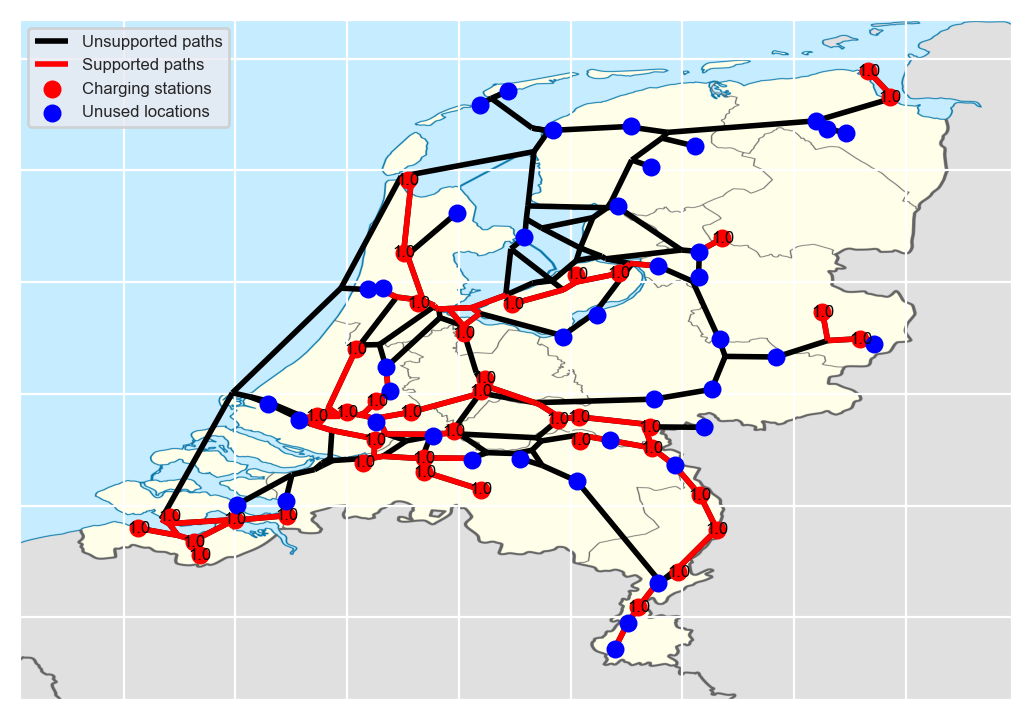

In [20]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities1, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(60000, 40, 2500, 5, vis=True)

In [21]:
print("Fraction captured total:", round(fraction_captured_total,2))
print("Fraction serviceable:", round(serviceable_fraction,2))
print("Serviced fraction:", round(served_fraction,2))
print("Expected occupation:", round(max_flow / (40 * 2500),2))

Fraction captured total: 0.09
Fraction serviceable: 0.09
Serviced fraction: 0.99
Expected occupation: 2.66


In [22]:
sum(optimal_facilities1.values())

40.0

In [23]:
captured_flows = {i:sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}

In [24]:
captured_flows = {i:j*flows[i] for i,j in captured_flows.items()}

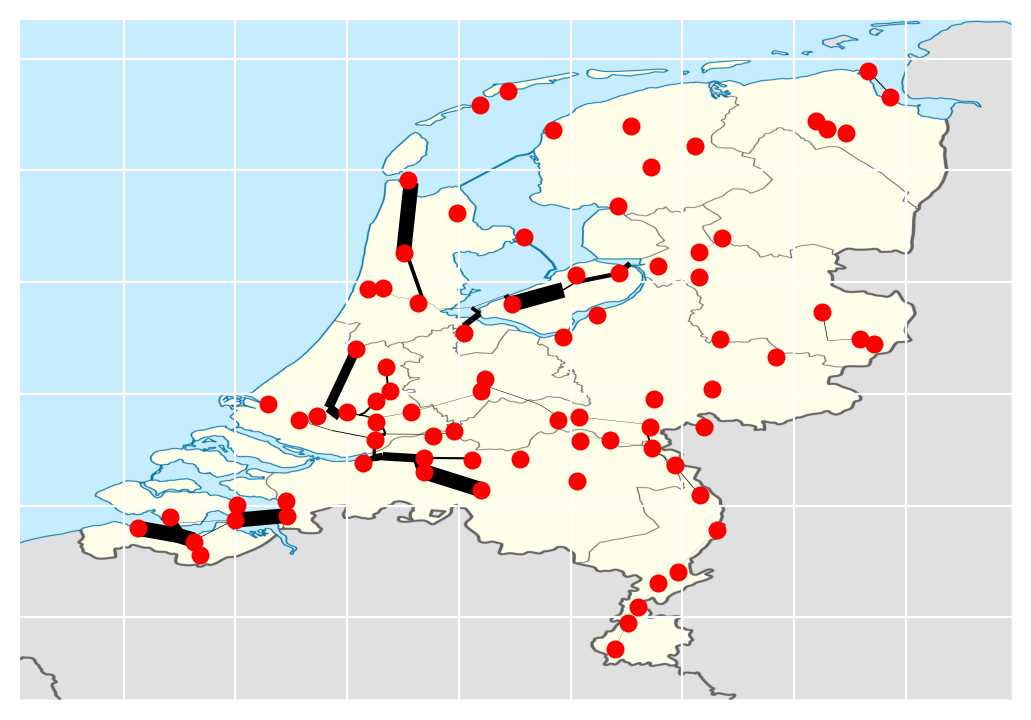

In [25]:
widths3 = plot_context(G, captured_flows, 'captured_flow_60000', 5)

In [26]:
widths3

{('8864153', '8860579'): 2661.5084469626313,
 ('8864153', '8868168'): 0.0,
 ('8868065', '8862419'): 0.0,
 ('8868065', '8866297'): 4277.3282170138955,
 ('8868065', '8863614'): 4277.3282170138955,
 ('8865920', '8864117'): 0.0,
 ('8864526', '8864005'): 4776.393402297339,
 ('8864526', '8862690'): 4776.393402297339,
 ('8864526', '8868457'): 0.0,
 ('8868208', '8861292'): 1288.033433744094,
 ('8868208', '8867148'): 1279.5912026453852,
 ('8860933', '8864167'): 0.0,
 ('8860933', '8863336'): 0.0,
 ('8860933', '8867031'): 0.0,
 ('8863354', '22638327'): 16983.621327869187,
 ('8863354', '8861687'): 16983.621327869187,
 ('8863354', '8862687'): 0.0,
 ('8863114', '22638019'): 14933.308272713055,
 ('8863114', '8864553'): 14933.308272713055,
 ('8863114', '8860623'): 0.0,
 ('8861840', '8863288'): 0.0,
 ('8861840', '8865143'): 0.0,
 ('8861840', '8863762'): 0.0,
 ('11309058', '11309119'): 0.0,
 ('11309058', '8865990'): 0.0,
 ('11309058', '8866775'): 0.0,
 ('8867046', '8862592'): 0.0,
 ('8867046', '8863360'

## 90000

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 2026.4622197119347*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',_'8867258')) + 2958.486641160946*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',_'8862497')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8864153',)) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8866512',)) + 15624.956869527026*Flow_captured_(('NLAMS',_'NLAER',_0),_('8866429',_'8864005')) + 21.60326583221266*Flow_captured_(('NLAMS',_'NLBOT',_1),_('8863206',_'8866564',_'8866429')) + 21.60326583221266*Flow_captured_(('NLAMS',_'NLBOT',_1),_('8866564',_'8866429',_'8863475')) + 67.67696184470229*Flow_captured_(('NLAMS',_'NLBOT',_2),_('8863206',_'8866429',_'8863360')) + 67.67696184470229*Flow_ca

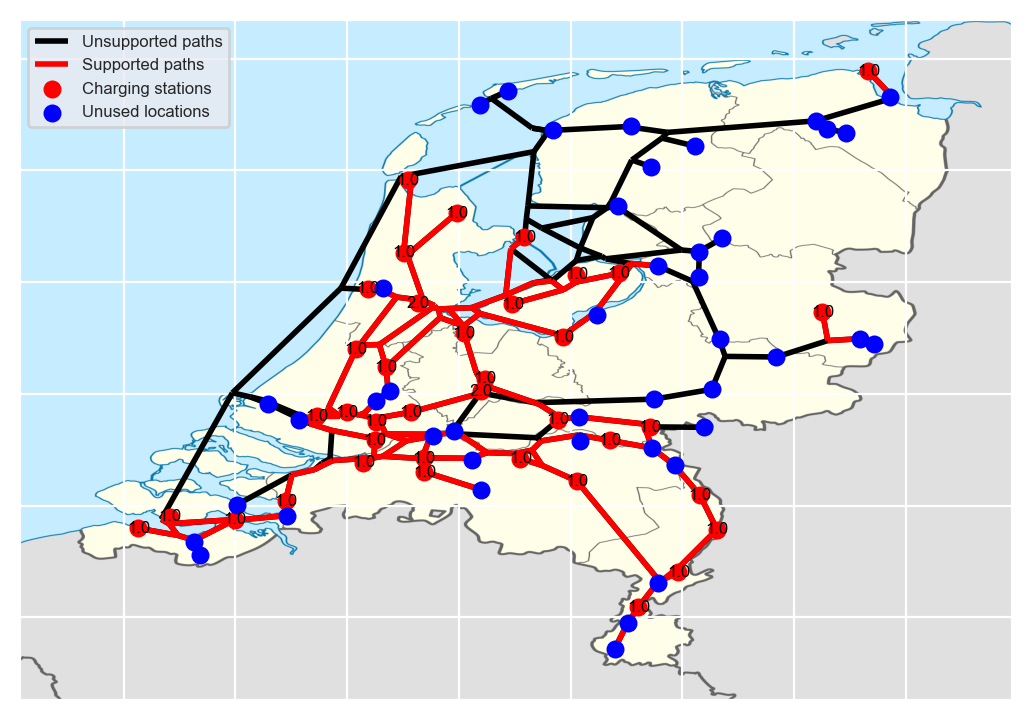

In [27]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities2, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(90000, 40, 2500, 5, vis=True)

In [28]:
print("Fraction captured total:", round(fraction_captured_total,2))
print("Fraction serviceable:", round(serviceable_fraction,2))
print("Serviced fraction:", round(served_fraction,2))
print("Expected occupation:", round(max_flow / (40 * 2500),2))

Fraction captured total: 0.24
Fraction serviceable: 0.24
Serviced fraction: 0.99
Expected occupation: 7.02


In [29]:
sum(optimal_facilities2.values())

40.0

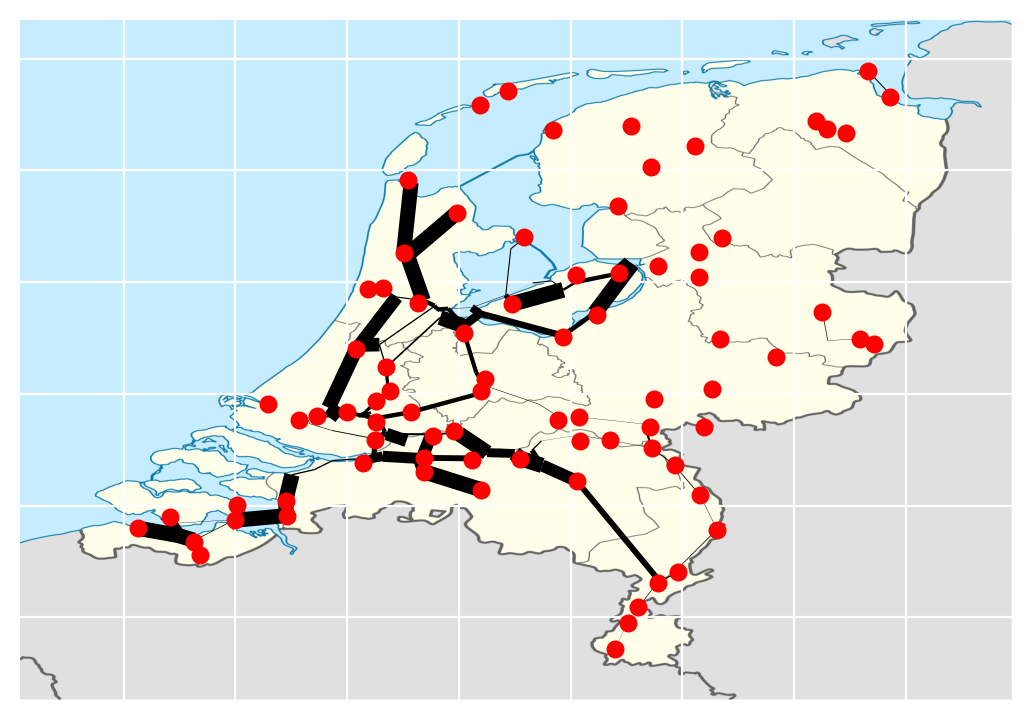

In [30]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths4 = plot_context(G, captured_flows, 'captured_flow_90000', 5)

## 120000

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683966*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683966*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.486641160946*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',_'8862497')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8864153',)) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('

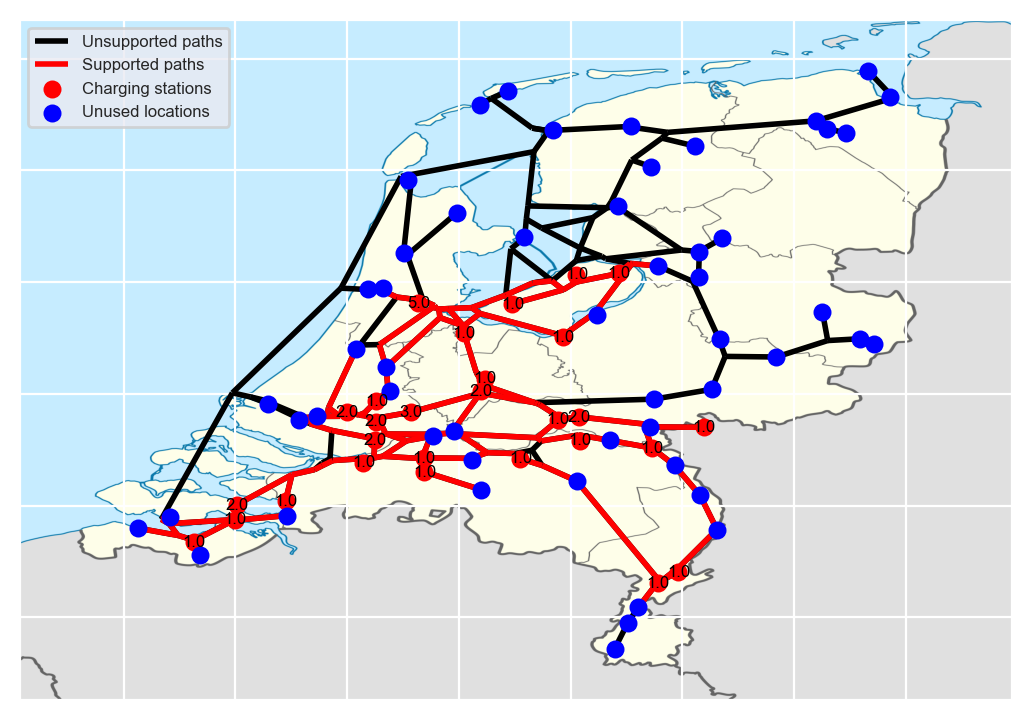

In [31]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities3, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(120000, 40, 2500, 5, vis=True)

In [32]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (40 * 2500), 2))

Fraction captured total: 0.51
Fraction serviceable: 0.53
Fraction serviced: 0.96
Expected occupation: 14.93


In [33]:
sum(optimal_facilities3.values())

40.0

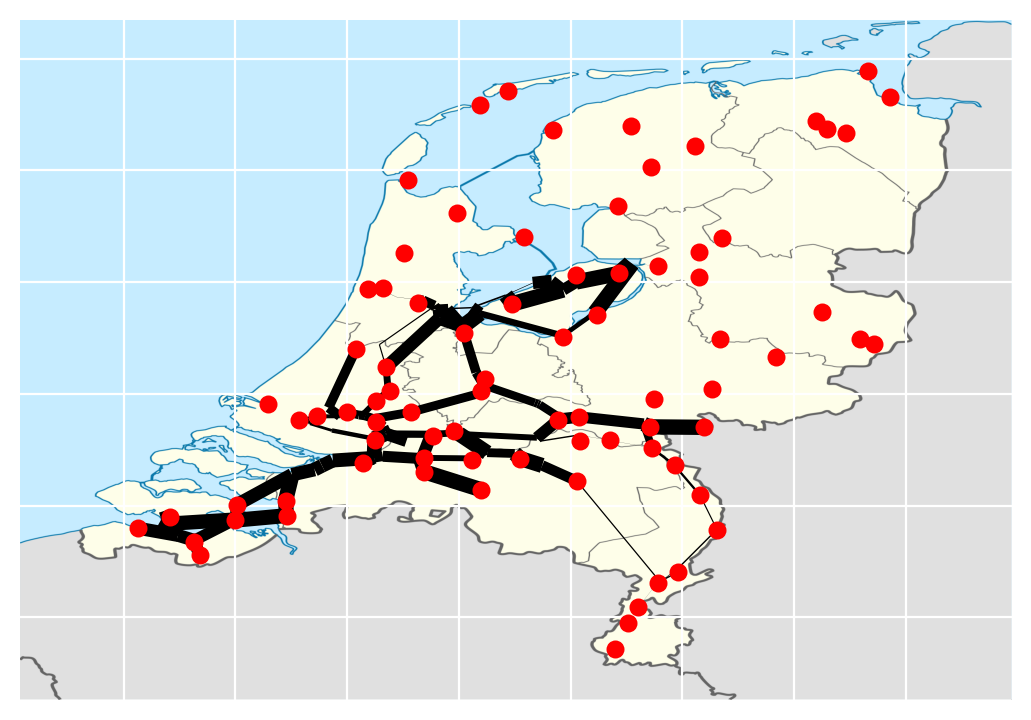

In [34]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths5 = plot_context(G, captured_flows, 'captured_flow_120000', 5)

## 150000

CFRLM:
MAXIMIZE
2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863306')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('88624

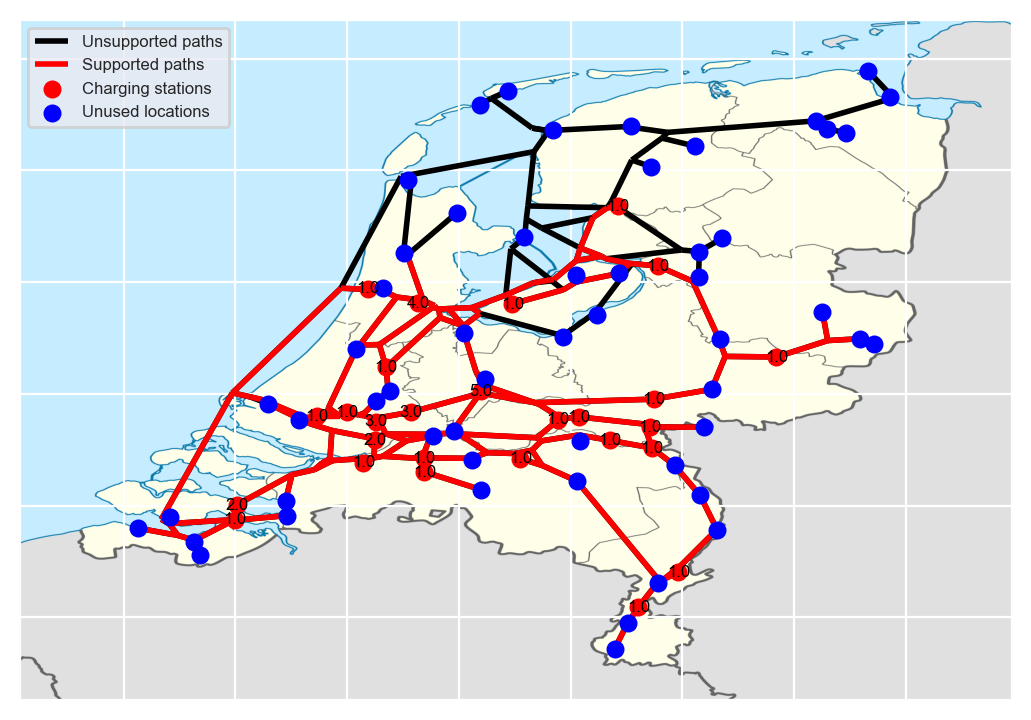

In [35]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities4, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 40, 2500, 5, vis=True, additional_nodes=0)

In [36]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (40 * 2500), 2))

Fraction captured total: 0.68
Fraction serviceable: 0.75
Fraction serviced: 0.92
Expected occupation: 20.14


In [37]:
sum(optimal_facilities4.values())

40.0

plotting does not work with extra nodes yet now...

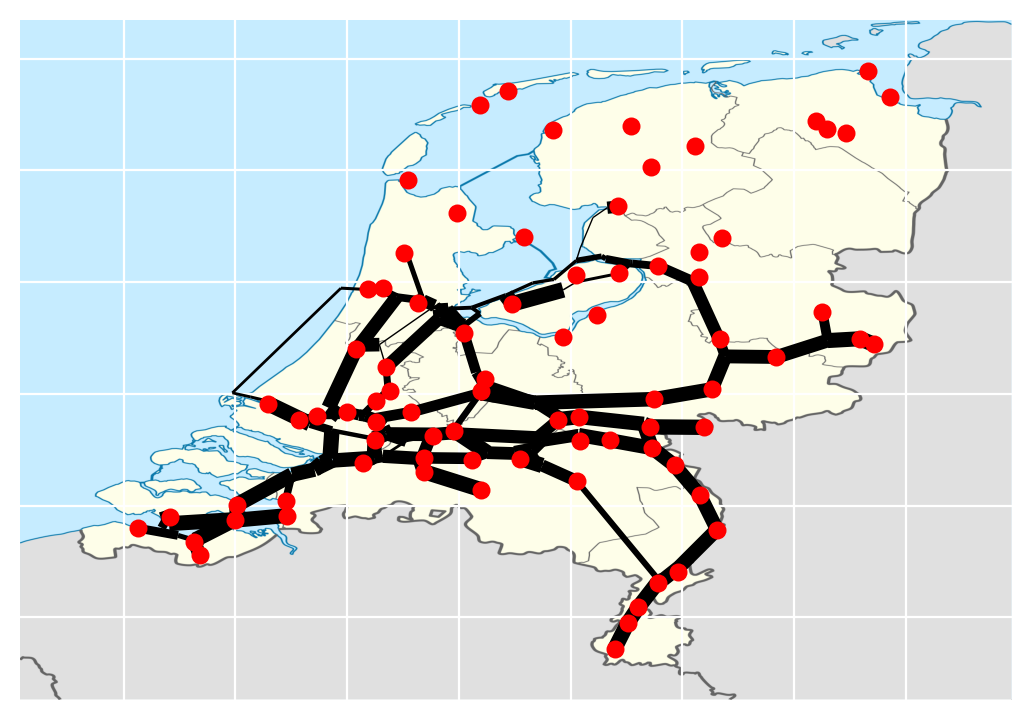

In [38]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths6 = plot_context(G, captured_flows, 'captured_flow_150000', 5)

## Compare outcomes in detail

In [39]:
df = pd.DataFrame([optimal_facilities1,optimal_facilities2,optimal_facilities3,optimal_facilities4])

In [40]:
df = df.T

In [41]:
df=df.rename(columns={0:'60km', 1:'90km', 2:'120km', 3:'150km'})

In [42]:
df.loc[df['60km']!=0].sum()

60km     40.0
90km     30.0
120km    31.0
150km    27.0
dtype: float64

In [43]:
df.loc[df['90km']!=0].sum()

60km     28.0
90km     40.0
120km    30.0
150km    32.0
dtype: float64

In [44]:
df.loc[df['120km']!=0].sum()

60km     21.0
90km     22.0
120km    40.0
150km    30.0
dtype: float64

In [45]:
df.loc[df['150km']!=0].sum()

60km     17.0
90km     22.0
120km    29.0
150km    40.0
dtype: float64

In [46]:
df_always = df.loc[(df>0).all(axis=1)]
df_always

60km  90km  120km  150km
22638146   1.0   1.0    1.0    1.0
30984595   1.0   1.0    1.0    1.0
8862448    1.0   1.0    1.0    1.0
8862776    1.0   1.0    3.0    3.0
8863306    1.0   1.0    2.0    1.0
8863818    1.0   1.0    1.0    1.0
8864005    1.0   1.0    1.0    1.0
8866429    1.0   2.0    5.0    4.0
8866893    1.0   1.0    1.0    1.0
8867130    1.0   1.0    2.0    2.0
8867392    1.0   2.0    2.0    5.0
8867824    1.0   1.0    1.0    1.0

### Density plots

In [47]:
# we want to scale all the points with the total number of stations
scale_factor=0.2
node_scales = dict(df.sum(axis=1))
scaled_widths = {i:(node_scales[i]/scale_factor) for i in node_scales.keys()}


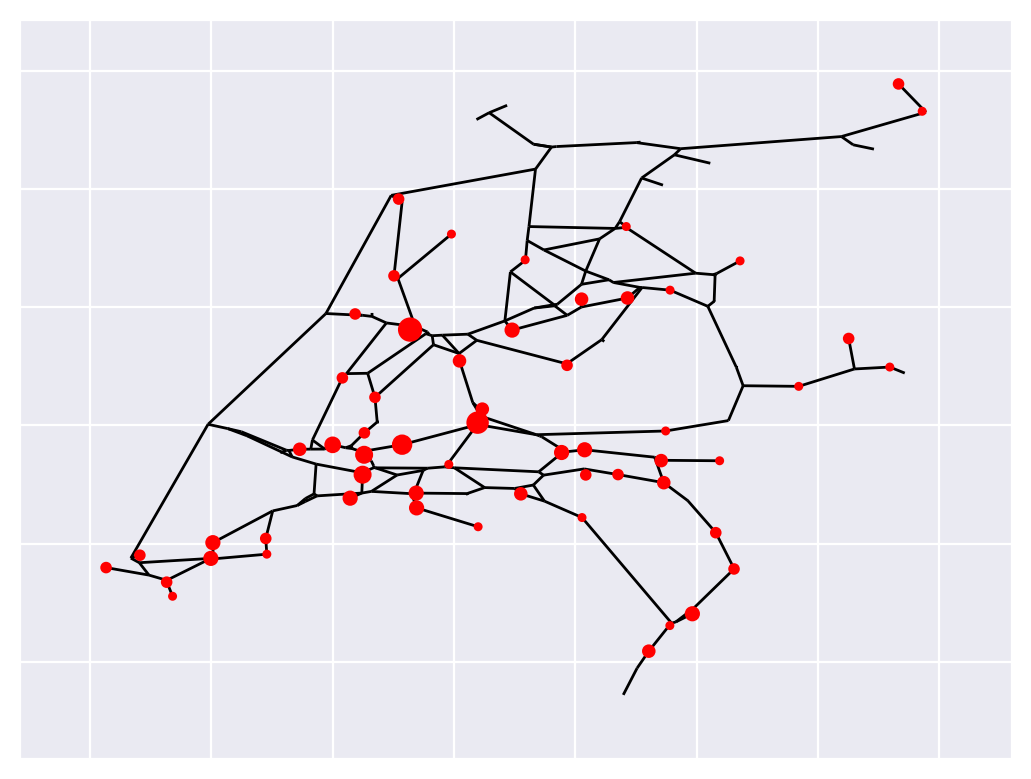

In [48]:
plt.subplots(dpi=200)
nx.draw_networkx_nodes(G,pos_dict,
                       nodelist=scaled_widths.keys(),
                       node_size=list(scaled_widths.values()),
                       node_color='r',
                       alpha=1)

nx.draw_networkx_edges(G,pos_dict)

In [49]:
df_always.index

Index(['22638146', '30984595', '8862448', '8862776', '8863306', '8863818',
       '8864005', '8866429', '8866893', '8867130', '8867392', '8867824'],
      dtype='object')

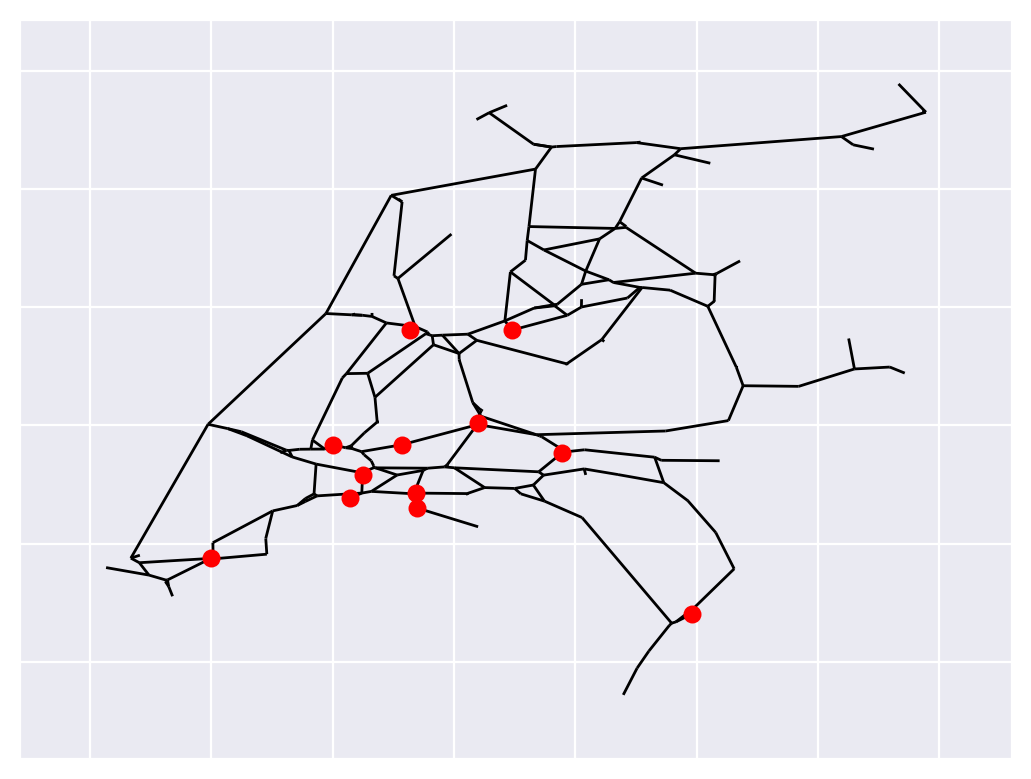

In [50]:
plt.subplots(dpi=200)
nx.draw_networkx_nodes(G,pos_dict,
                       nodelist=list(df_always.index),
                       node_size=30,
                       node_color='r',
                       alpha=1)

nx.draw_networkx_edges(G,pos_dict)

## Extreme values

### Max range 1,000,000, 40 modules

CFRLM:
MAXIMIZE
2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683964*Flow_captured_(('NLAER',_'NLNIE',_0),_('8863360',)) + 11277.026528683964*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',)) + 11277.026528683964*Flow_captured_(('NLAER',_'NLNIE',_0),_('8867538',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8863306',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8863360',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8867538',)) + 2026.462219711935*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.462219711935*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.4866411609446*Flow_captured_(('NLALK',

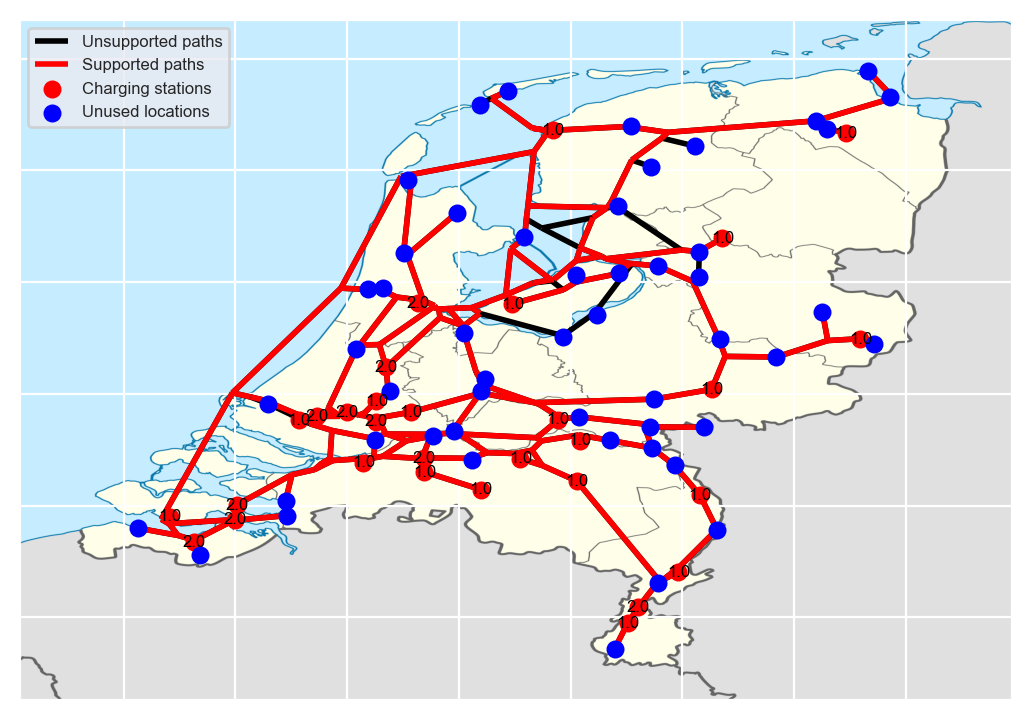

In [51]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(1000000, 40, 1000, 2, vis=True)

In [52]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (40 * 1000), 2))

Fraction captured total: 0.33
Fraction serviceable: 1.0
Fraction serviced: 0.33
Expected occupation: 24.0


In [53]:
sum(optimal_facilities.values())

40.0

In [54]:
routes_supported

146.0

In [55]:
for route, combi_flow in non_zero_flows.items():
    print(sum(combi_flow['flows']))

1.0
1.0
1.0
1.0
1.0
0.89189701
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.93321438
1.0
1.0
1.0
0.11425705
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.28658985
1.0
1.0
1.0
1.0
1.0
0.23104866
1.0
1.0
0.9077079530000001
1.0
0.95735762
1.0
1.0
1.0
1.0
1.0
1.0
0.70507875
1.0
1.0
1.0
0.355192995
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.78222421
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.91561242
1.0
1.0
0.86625075
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.995148
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7885200800000001
0.50304132
1.0
1.0
0.93714279
0.34444432
1.0
0.19398805
0.098140339
1.0
1.0
1.0
1.0
0.55922826
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5909257889999999
1.0
1.0
1.0
0.999999993
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.55390602
1.0
1.0
1.0
1.0


In [56]:
max_flow

959999.9993679216

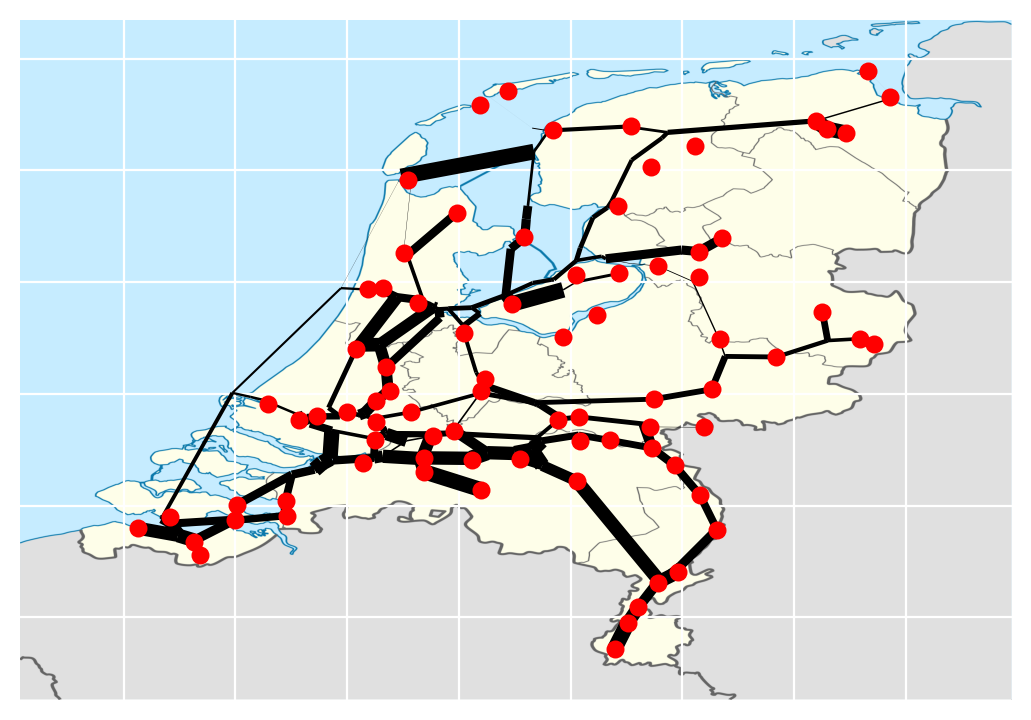

In [57]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths7 = plot_context(G, captured_flows, 'captured_flow_1mln', 5)

In [58]:
flow_cols = [col for col in df_links.columns if 'flow' in col]

In [59]:
flow_cols

['passing_flow',
 'captured_flow_60000',
 'captured_flow_90000',
 'captured_flow_120000',
 'captured_flow_150000',
 'captured_flow_1mln']

In [60]:
df_links[flow_cols].sum()

passing_flow            6.233165e+07
captured_flow_60000     2.722831e+06
captured_flow_90000     1.090341e+07
captured_flow_120000    2.900691e+07
captured_flow_150000    4.132648e+07
captured_flow_1mln      2.140859e+07
dtype: float64

### Single station with unlimited capacity and range

CFRLM:
MAXIMIZE
2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683964*Flow_captured_(('NLAER',_'NLNIE',_0),_('8863360',)) + 11277.026528683964*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',)) + 11277.026528683964*Flow_captured_(('NLAER',_'NLNIE',_0),_('8867538',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8863306',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8863360',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',)) + 29584.428391712187*Flow_captured_(('NLAER',_'NLRTM',_0),_('8867538',)) + 2026.462219711935*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.462219711935*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.4866411609446*Flow_captured_(('NLALK',

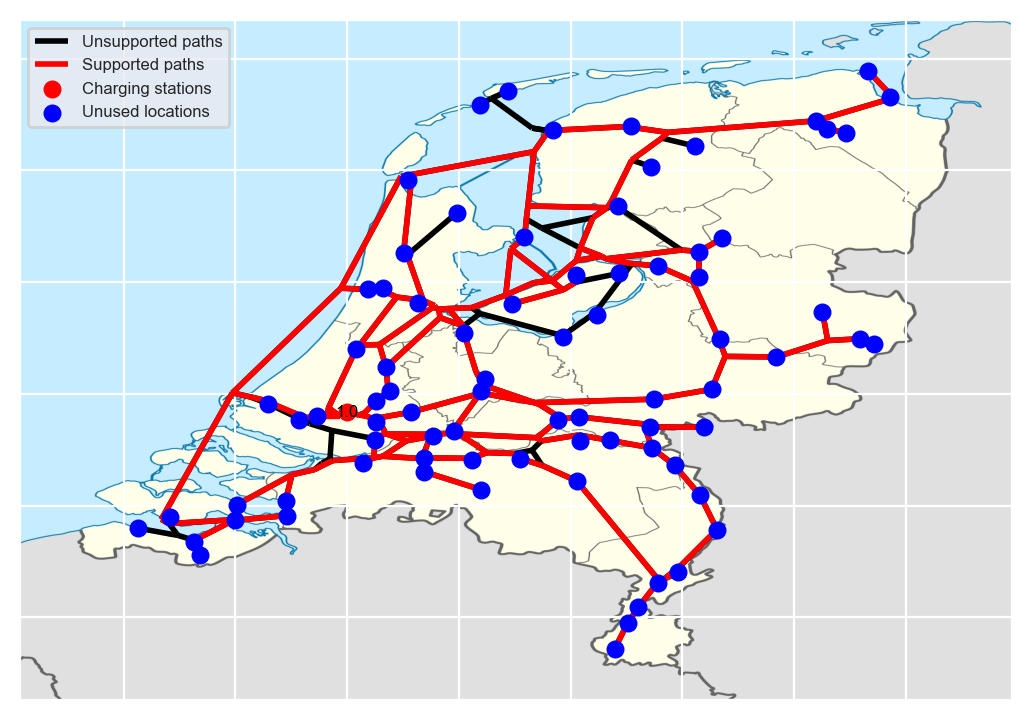

In [61]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(1000000, 1, 10e12, 2, vis=True)

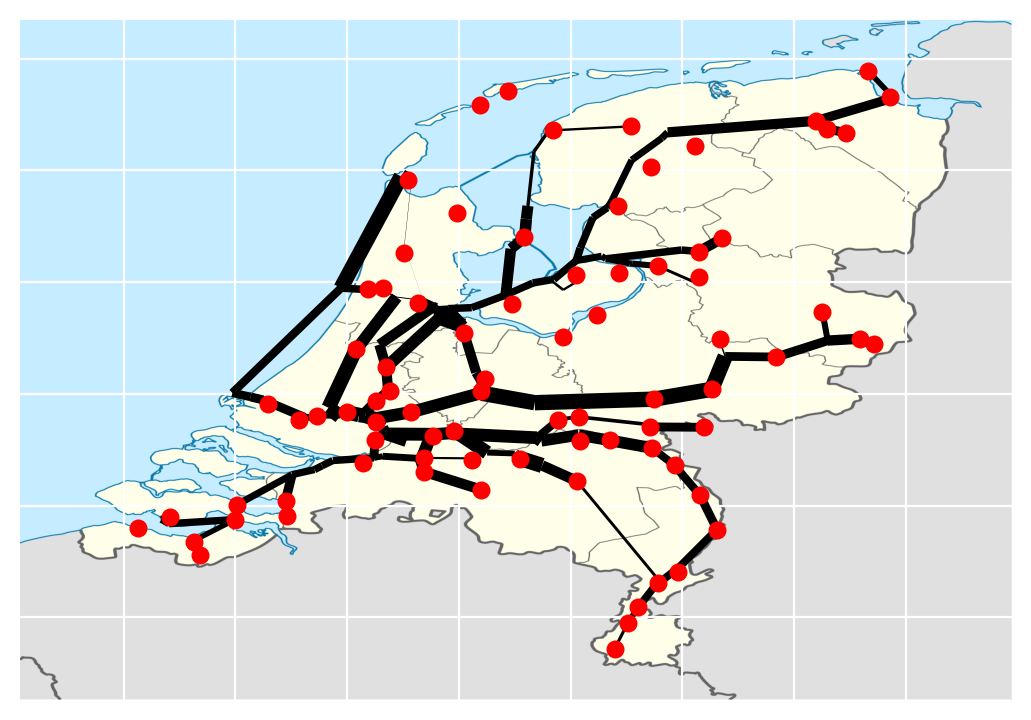

In [62]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths7 = plot_context(G, captured_flows, 'captured_flow_1mln_single', 5)

In [63]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Charging:", round(max_flow / (1 * 10e12), 2))

Fraction captured total: 0.58
Fraction serviceable: 1.0
Fraction serviced: 0.58
Charging: 0.0


In [64]:
non_zero_flows

{('NLABL', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLAER', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLBON', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLBON', 'NLRTM', 1): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLBZM', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLBZM', 'NLRTM', 1): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLCUY', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLCUY', 'NLRTM', 1): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLDHR', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLDHR', 'NLRTM', 1): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLDOR', 'NLRTM', 0): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLDOR', 'NLRTM', 1): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLEEM', 'NLRTM', 1): {'combinations': [['8863306']], 'flows': [1.0]},
 ('NLEEM', 'NLRTM', 2): {'combinations': [['8863306

### Single station, limited capacity, range of 60000, 90000, 120000, and 150000

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',_'8863709')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',_'8867258')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8866512',_'8864153')) + 15624.956869527025*Flow_captured_(('NLAMS',_'NLAER',_0),_('8866429',_'8864005')) + 2227.395968233117*Flow_captured_(('NLAMS',_'NLDHR',_0),_('8866429',_'8861625',_'8861568')) + 832.5368028995592*Flow_captured_(('NLAMS',_'NLIJM',_0),_('8862497',)) + 832.5368028995592*Flow_captured_(('NLAMS',_'NLIJM',_0),_('8866429',)) + 991.9932938966092*Flow_captured_(('NLBNB',_'NLHGL',_0),_('8866512',_'8864153')) + 494.8630379993027*Flow_captured_(('NLBON',_'NLSTI',_0),_('22638156',)) + 494.8630379993027*Flow_captured_(('NLBON',_'NLSTI',_0),_('8868208',)) + 3072.746109244969*Flow_captured_(('NLBZM',

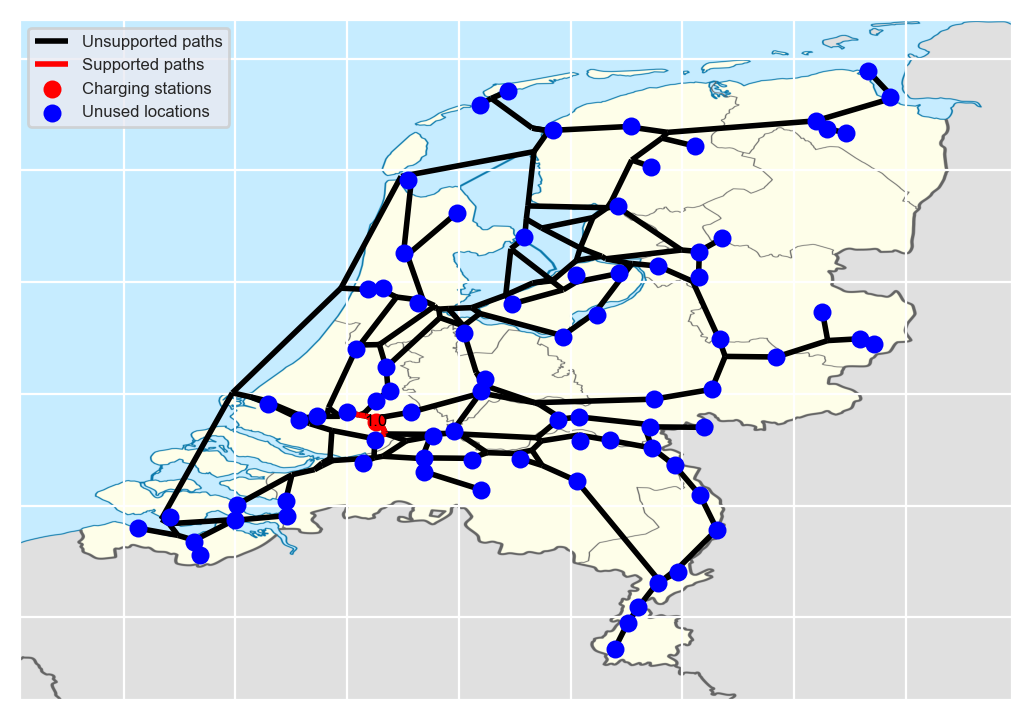

In [65]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(60000, 1, 10e12, 2, vis=True)

In [66]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

Fraction captured total: 0.0
Fraction serviceable: 0.09
Fraction serviced: 0.05


CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 2026.4622197119347*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',_'8867258')) + 2958.486641160946*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',_'8862497')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8864153',)) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8866512',)) + 15624.956869527026*Flow_captured_(('NLAMS',_'NLAER',_0),_('8866429',_'8864005')) + 21.60326583221266*Flow_captured_(('NLAMS',_'NLBOT',_1),_('8863206',_'8866564',_'8866429')) + 21.60326583221266*Flow_captured_(('NLAMS',_'NLBOT',_1),_('8866564',_'8866429',_'8863475')) + 67.67696184470229*Flow_captured_(('NLAMS',_'NLBOT',_2),_('8863206',_'8866429',_'8863360')) + 67.67696184470229*Flow_ca

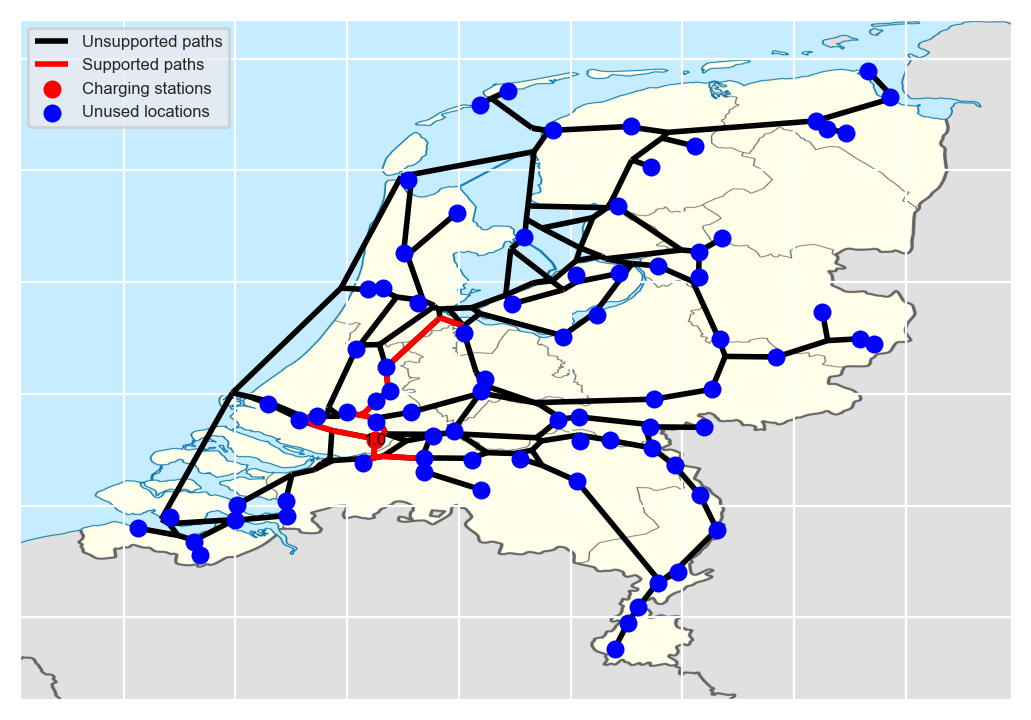

In [67]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(90000, 1, 10e12, 2, vis=True)

In [68]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

Fraction captured total: 0.02
Fraction serviceable: 0.24
Fraction serviced: 0.1


CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683966*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683966*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.486641160946*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',_'8862497')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8864153',)) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('

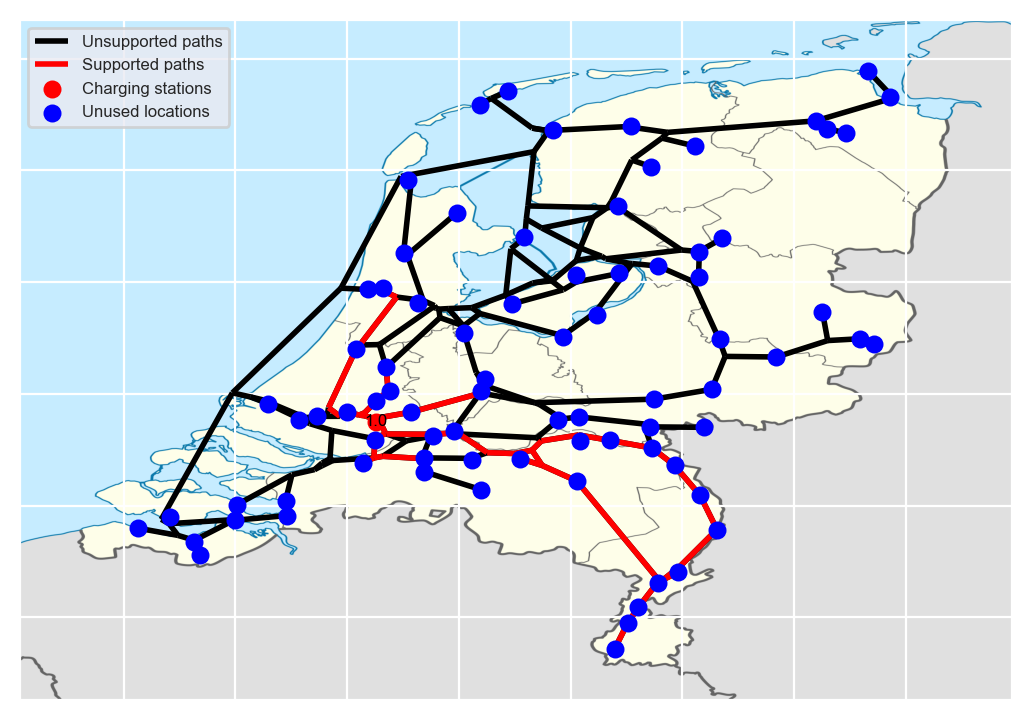

In [69]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(120000, 1, 10e12, 2, vis=True)

In [70]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

Fraction captured total: 0.03
Fraction serviceable: 0.53
Fraction serviced: 0.06


CFRLM:
MAXIMIZE
2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863306')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('88624

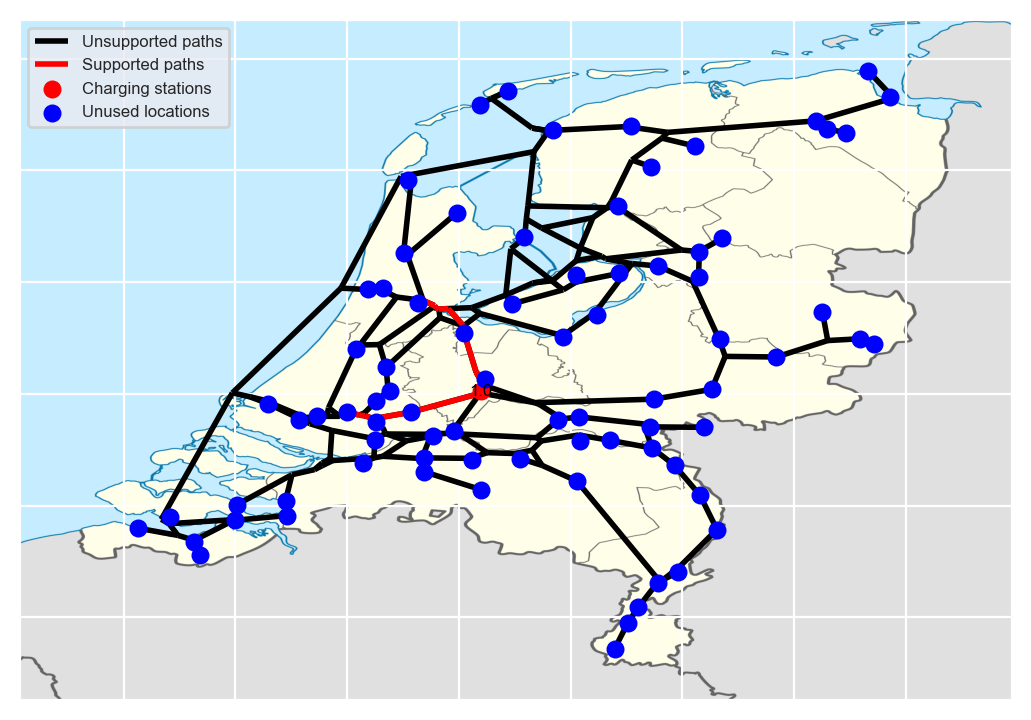

In [71]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 1, 10e12, 2, vis=True)

In [72]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

Fraction captured total: 0.09
Fraction serviceable: 0.75
Fraction serviced: 0.12


## Scenario that covers large part of the network

CFRLM:
MAXIMIZE
2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863306')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('88624

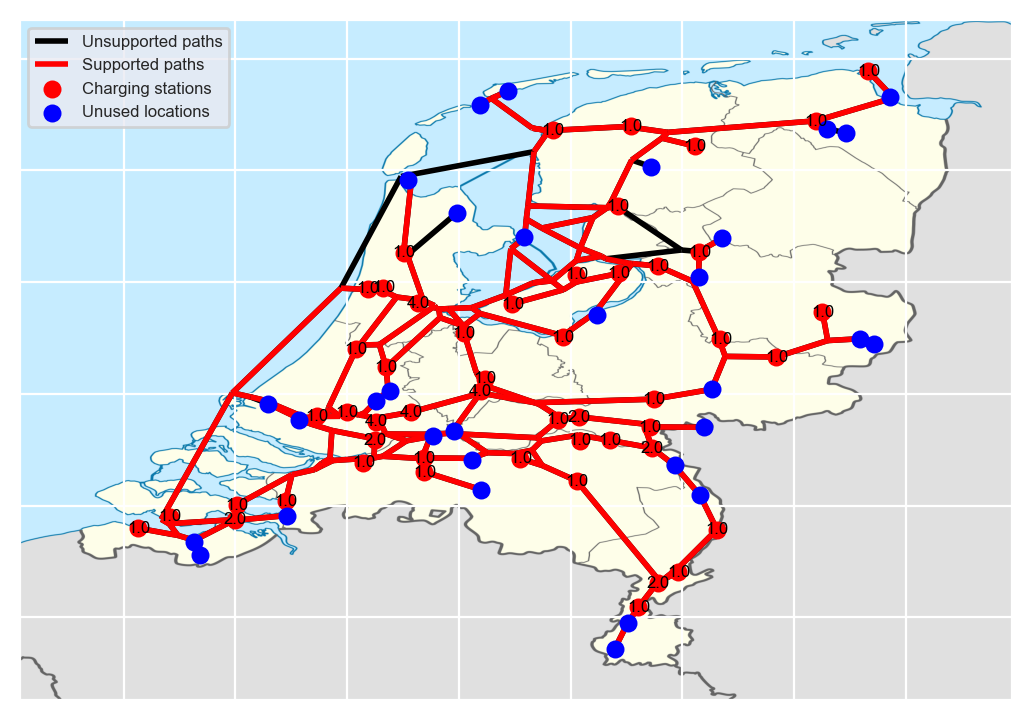

In [73]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities4, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 100, 2500, 4, vis=True, additional_nodes=0)

In [74]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (40 * 2500), 2))
print(sum(optimal_facilities4.values()))

Fraction captured total: 0.72
Fraction serviceable: 0.75
Fraction serviced: 0.96
Expected occupation: 21.07
67.0


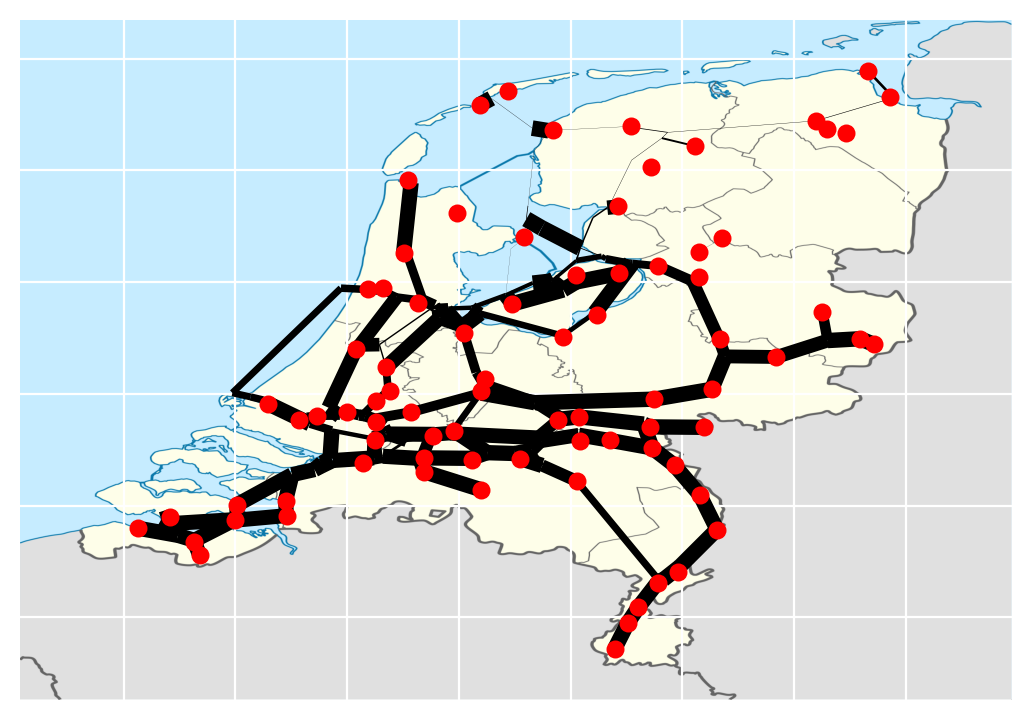

In [75]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths6 = plot_context(G, captured_flows, 'captured_flow_150000_100', 5)